In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wiseman, Mr. Phillippe",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
survived=train[train['Survived']==1]
not_survived=train[train['Survived']==0]
s=survived['Survived'].sum()
ns=len(not_survived)
print("Survived : ", s, "(", ("%.1f" % (s/(s+ns)*100)), "%)")
print("Not_Survived : ", ns, "(", ("%.1f" % (ns/(s+ns)*100)),"%)")
print("Total : ", s+ns)

Survived :  342 ( 38.4 %)
Not_Survived :  549 ( 61.6 %)
Total :  891


In [8]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train.groupby(['Pclass', 'Survived']).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [10]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass'>

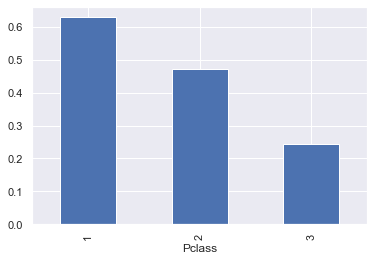

In [11]:
train.groupby('Pclass').Survived.mean().plot(kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

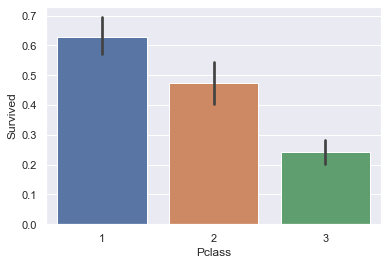

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [13]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [14]:
train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

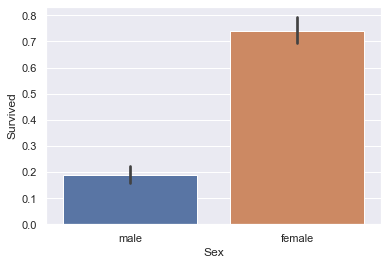

In [15]:
sns.barplot(x='Sex', y='Survived', data=train)

In [16]:
pd.crosstab(train['Pclass'], train['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


C:\Users\msi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


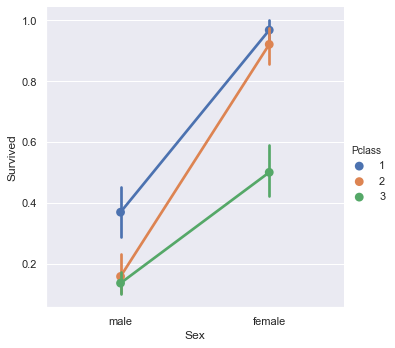

In [17]:
sns.factorplot('Sex','Survived', hue='Pclass', data=train)

C:\Users\msi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


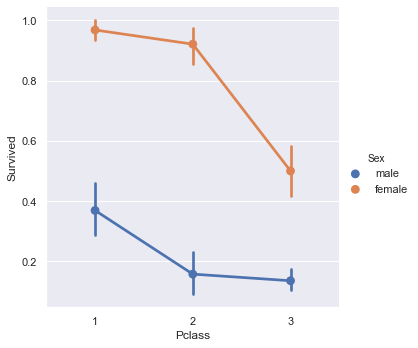

In [18]:
sns.factorplot('Pclass','Survived', hue='Sex', data=train)

C:\Users\msi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


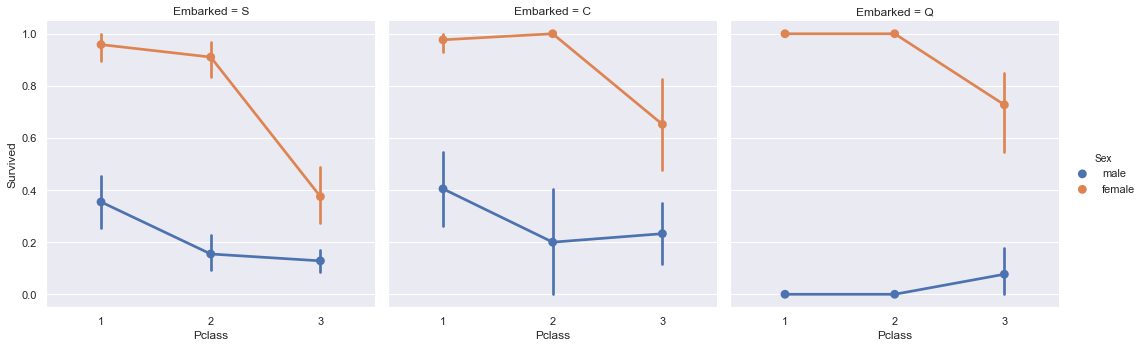

In [19]:
sns.factorplot('Pclass','Survived', hue='Sex', col='Embarked', data=train)

In [20]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

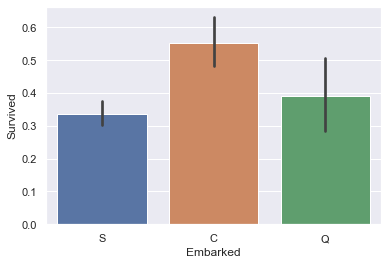

In [22]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [23]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [25]:
train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

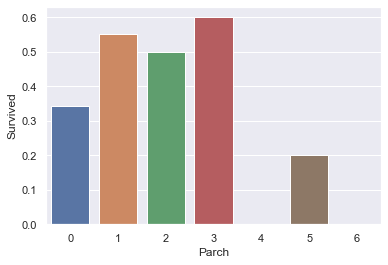

In [26]:
sns.barplot(x='Parch', y='Survived', data=train, ci=None)

In [27]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [28]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

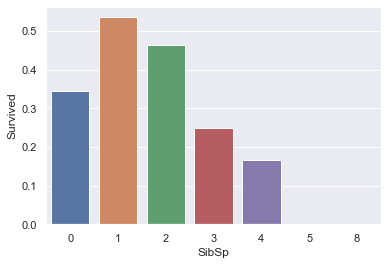

In [29]:
sns.barplot(x='SibSp', y='Survived', data=train, ci=None)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

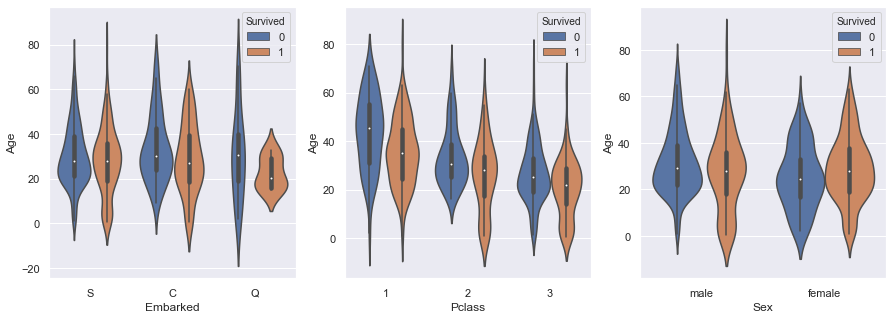

In [30]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.violinplot(x='Embarked', y='Age', hue='Survived', data=train, ax=ax1)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, ax=ax2)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, ax=ax3)
#sns.violinplot
#흰색점 : 중앙값(median)
#중앙의 두꺼운 선 : 사분위 범위
#중앙의 얇은 선 : 신뢰구간(95% 신뢰구간)

In [31]:
total_survived=train[train['Survived']==1]
total_not_survived=train[train['Survived']==0]
male_survived=train[(train['Survived']==1) & (train['Sex']=='male')]
female_survived=train[(train['Survived']==1) & (train['Sex']=='female')]
male_not_survived=train[(train['Survived']==0) & (train['Sex']=='male')]
female_not_survived=train[(train['Survived']==0) & (train['Sex']=='female')]

In [32]:
total_survived['Age'].dropna().values

array([38.  , 26.  , 35.  , 27.  , 14.  ,  4.  , 58.  , 55.  , 34.  ,
       15.  , 28.  , 38.  , 14.  ,  3.  , 19.  , 49.  , 29.  , 21.  ,
        5.  , 38.  , 29.  , 17.  , 32.  ,  0.83, 30.  , 29.  , 17.  ,
       33.  , 23.  , 23.  , 34.  , 21.  , 32.5 , 12.  , 24.  , 29.  ,
       19.  , 22.  , 24.  , 27.  , 22.  , 16.  , 40.  ,  9.  ,  1.  ,
        1.  ,  4.  , 45.  , 32.  , 19.  ,  3.  , 44.  , 58.  , 18.  ,
       26.  , 16.  , 40.  , 35.  , 31.  , 27.  , 32.  , 16.  , 38.  ,
       19.  , 35.  ,  5.  ,  8.  , 24.  , 37.  , 29.  , 30.  , 35.  ,
       50.  ,  3.  , 25.  , 58.  , 35.  , 25.  , 41.  , 63.  , 35.  ,
       19.  , 30.  , 42.  , 22.  , 26.  , 19.  , 50.  ,  0.92, 17.  ,
       30.  , 24.  , 18.  , 26.  , 24.  , 31.  , 40.  , 30.  , 22.  ,
       36.  , 36.  , 31.  , 16.  , 41.  , 45.  ,  2.  , 24.  , 24.  ,
       40.  ,  3.  , 22.  , 60.  , 24.  , 25.  , 22.  , 42.  ,  1.  ,
       35.  , 36.  , 17.  , 36.  , 21.  , 23.  , 24.  , 28.  , 39.  ,
        3.  , 33.  ,

<AxesSubplot:xlabel='Age'>

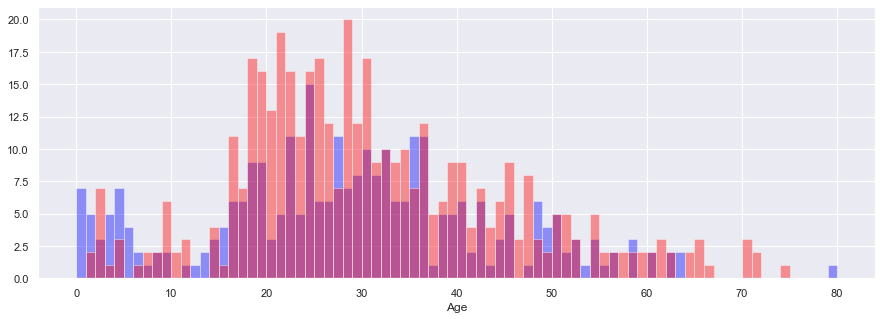

In [33]:
plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, kde=False, bins=range(0,81,1), color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, kde=False, bins=range(0,81,1), color='red', axlabel='Age')

<AxesSubplot:xlabel='Male Age'>

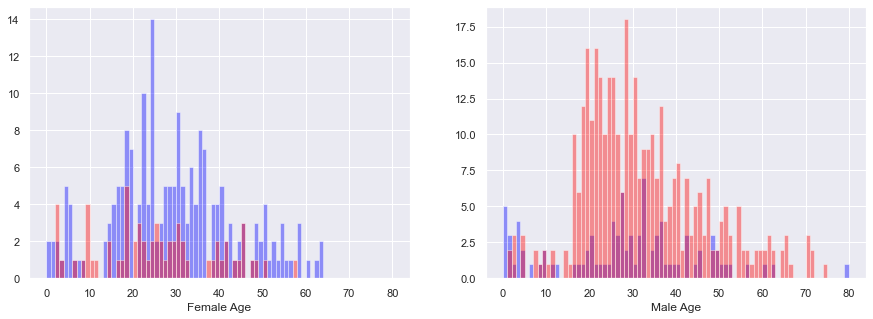

In [34]:
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, kde=False, bins=range(0,81,1), color='blue', axlabel='Female Age')
sns.distplot(female_not_survived['Age'].dropna().values, kde=False, bins=range(0,81,1), color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, kde=False, bins=range(0,81,1), color='blue', axlabel='Male Age')
sns.distplot(male_not_survived['Age'].dropna().values, kde=False, bins=range(0,81,1), color='red', axlabel='Male Age')

In [35]:
train.drop('PassengerId', axis=1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

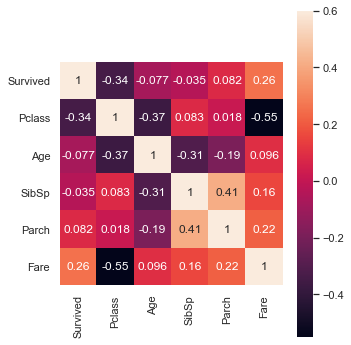

In [36]:
plt.figure(figsize=(5,6))
sns.heatmap(train.drop('PassengerId', axis=1).corr(), square=True, annot=True, vmax=0.6)

In [37]:
train_test_data=[train, test]

In [38]:
for dataset in train_test_data:\
    dataset['Title']=dataset.Name.str.extract("([A-Za-z]+)\.")

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [41]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [42]:
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title']=dataset['Title'].replace('Ms', 'Miss')
    dataset['Title']=dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title']=dataset['Title'].replace('Lady', 'Mrs')
    dataset['Title']=dataset['Title'].replace(['Countess', 'Don', 'Sir', 'Jonkheer', 'Capt', 'Major', 'Col', 'Rev', 'Dr'], 'Others')

In [43]:
train.Title.value_counts()

Mr        517
Miss      185
Mrs       127
Master     40
Others     22
Name: Title, dtype: int64

In [44]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,127,0
Others,2,20


In [45]:
train[['Title', 'Survived']].groupby(['Title']).mean()
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.795276
4,Others,0.318182


In [46]:
title_mapping={'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Others':5}

In [47]:
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)

In [48]:
train['Title']

0      1
1      3
2      2
3      3
4      1
      ..
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 891, dtype: int64

In [49]:
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map({'female':1, 'male':0})

In [50]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1


In [51]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [53]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [54]:
train['Age'].isnull().sum()

177

In [55]:
for dataset in train_test_data:
    age_avg=dataset['Age'].mean()
    age_std=dataset['Age'].std()
    age_null_count=dataset['Age'].isnull().sum()
    
    age_null_random_list=np.random.randint(age_avg-age_std, age_avg+age_std, 
                                           size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])]=age_null_random_list

C:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    17.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [57]:
train['AgeBand']=pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.558559
1,"(16.336, 32.252]",0.343964
2,"(32.252, 48.168]",0.375479
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [58]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age']=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), 'Age']=1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48), 'Age']=2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), 'Age']=3
    dataset.loc[(dataset['Age']>64) , 'Age']=4

In [59]:
for dataset in train_test_data:
    dataset['Fare']=dataset['Fare'].fillna(train['Fare'].median())

In [60]:
train['FareBand']=pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [61]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=7.91, 'Fare']=0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), 'Fare']=1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31.0), 'Fare']=2
    dataset.loc[(dataset['Fare']>31.0) , 'Fare']=3
    dataset['Fare']=dataset['Fare'].astype(int)

In [62]:
for dataset in train_test_data:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

In [63]:
for dataset in train_test_data:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone']=1
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [64]:
features_drop=['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)
train=train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [65]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,0,0,1,0
1,1,1,1,2.0,3,1,3,0
2,1,3,1,1.0,1,0,2,1
3,1,1,1,2.0,3,0,3,0
4,0,3,0,2.0,1,0,1,1


In [66]:
xTrain=train.drop('Survived', axis=1)
yTrain=train['Survived']
xTest=test.drop('PassengerId', axis=1).copy()
xTrain.shape, yTrain.shape, xTest.shape

((891, 7), (891,), (418, 7))

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model=DecisionTreeClassifier()
model.fit(xTrain, yTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
round(model.score(xTrain, yTrain)*100,2)

87.54

In [70]:
y_pred_dt=model.predict(xTest)
y_pred_dt

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [71]:
mysubmit=pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived':y_pred_dt})
mysubmit.to_csv("mysubmit.csv", index=False)

In [72]:
# random forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
randomForest=RandomForestClassifier(n_estimators=100)

In [76]:
randomForest.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
yPred=randomForest.predict(xTest)

In [78]:
randomForest.score(xTrain, yTrain)

0.8754208754208754

In [80]:
mysubmit=pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived':yPred})
mysubmit.to_csv("mysubmit.csv", index=False)

In [81]:
from sklearn.model_selection import GridSearchCV

In [97]:
params={'n_estimators':[11,31,51], 'max_depth':[3,5,7], 'min_samples_split':[4,6,8]}

In [98]:
rfModel=RandomForestClassifier(random_state=924, n_jobs=-1)

In [100]:
gridCV=GridSearchCV(rfModel, param_grid=params, cv=5, n_jobs=-1)

In [101]:
gridCV.fit(xTrain, yTrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=924,
                                   

In [102]:
print(gridCV.best_params_)

{'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 51}


In [104]:
print(gridCV.best_score_)

0.8148138848785387


In [82]:
randomForest=RandomForestClassifier(n_estimators=200, min_samples_split=3, max_depth=)

In [103]:
randomForest=RandomForestClassifier(n_estimators=51, min_samples_split=6, max_depth=5, n_jobs=-1)
randomForest.fit(xTrain, yTrain)
yPred=randomForest.predict(xTest)
randomForest.score(xTrain, yTrain)

0.8327721661054994

In [88]:
mysubmit=pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived':yPred})
mysubmit.to_csv("mysubmit.csv", index=False)